<a href="https://colab.research.google.com/github/ShinHyun-soo/DLstudy/blob/main/Document_Categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
from keras.datasets import reuters
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation

import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=100, test_split=0.2)
print('x_train 길이:', len(x_train))
print('x_test 길이:', len(x_test))

2110848/2110848 [==============================] - 0s 0us/step
x_train 길이: 8982
x_test 길이: 2246


In [ ]:
print(x_train[0])

[1, 2, 2, 8, 43, 10, 2, 5, 25, 2, 2, 5, 2, 2, 16, 2, 2, 90, 67, 7, 89, 5, 19, 2, 6, 19, 2, 15, 90, 67, 84, 22, 2, 26, 7, 48, 4, 49, 8, 2, 39, 2, 2, 6, 2, 6, 83, 11, 15, 22, 2, 11, 15, 7, 48, 9, 2, 2, 2, 6, 2, 6, 2, 11, 15, 22, 2, 44, 11, 15, 16, 8, 2, 2, 90, 67, 52, 29, 2, 30, 32, 2, 6, 2, 15, 17, 12]


In [ ]:
reuters_word_idx = reuters.get_word_index()
print( 'vocab 길이:', len(reuters_word_idx.values()))

550378/550378 [==============================] - 0s 0us/step
vocab 길이: 30979


In [ ]:
r_word_idx = dict([(value, key) for (key, value) in
                   reuters_word_idx.items()])
for i in range(1, 6):
  print( r_word_idx[i] )

the
of
to
in
said


In [ ]:
for key in x_train[0]:
  print( r_word_idx[key], end=' ' )

the of of mln loss for of said at of of said of of 1 of of april 0 a after said from of and from of 000 april 0 prices its of year a but in this mln of an of of and of and revs vs 000 its of vs 000 a but 3 of of of and of and of vs 000 its of 4 vs 000 1 mln of of april 0 are 2 of will billion of and of 000 pct dlrs 

In [ ]:
from keras.utils.np_utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

print( y_train[0] )
print( y_train_onehot[0] )

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
def vectorize_sequences(sequences, dimension=100):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [ ]:
x_train_vec = vectorize_sequences(x_train)
x_test_vec = vectorize_sequences(x_test)

print( x_train[0] )
print( x_train_vec[0] )

[1, 2, 2, 8, 43, 10, 2, 5, 25, 2, 2, 5, 2, 2, 16, 2, 2, 90, 67, 7, 89, 5, 19, 2, 6, 19, 2, 15, 90, 67, 84, 22, 2, 26, 7, 48, 4, 49, 8, 2, 39, 2, 2, 6, 2, 6, 83, 11, 15, 22, 2, 11, 15, 7, 48, 9, 2, 2, 2, 6, 2, 6, 2, 11, 15, 22, 2, 44, 11, 15, 16, 8, 2, 2, 90, 67, 52, 29, 2, 30, 32, 2, 6, 2, 15, 17, 12]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
inputs = Input(shape=(100,))
outputs = Dense(46, activation='softmax')(inputs)
model_v1 = Model(inputs=inputs, outputs=outputs)

model_v1.compile(loss='categorical_crossentropy',
                 optimizer='rmsprop',
                 metrics=['accuracy'])

In [ ]:
history_1 = model_v1.fit(x_train_vec, y_train_onehot,
                         batch_size=32,
                         epochs=30,
                         verbose=1,
                         validation_split=0.1)

Epoch 1/30
253/253 [==============================] - 5s 6ms/step - loss: 2.4333 - accuracy: 0.4324 - val_loss: 2.0044 - val_accuracy: 0.5284
Epoch 2/30
253/253 [==============================] - 1s 3ms/step - loss: 1.7539 - accuracy: 0.5735 - val_loss: 1.7614 - val_accuracy: 0.6073
Epoch 3/30
253/253 [==============================] - 1s 5ms/step - loss: 1.5629 - accuracy: 0.6172 - val_loss: 1.6412 - val_accuracy: 0.6363
Epoch 4/30
253/253 [==============================] - 1s 5ms/step - loss: 1.4522 - accuracy: 0.6465 - val_loss: 1.5709 - val_accuracy: 0.6496
Epoch 5/30
253/253 [==============================] - 1s 6ms/step - loss: 1.3729 - accuracy: 0.6697 - val_loss: 1.5256 - val_accuracy: 0.6541
Epoch 6/30
253/253 [==============================] - 1s 5ms/step - loss: 1.3187 - accuracy: 0.6818 - val_loss: 1.4912 - val_accuracy: 0.6607
Epoch 7/30
253/253 [==============================] - 1s 5ms/step - loss: 1.2763 - accuracy: 0.6886 - val_loss: 1.4700 - val_accuracy: 0.6707
Epoch 

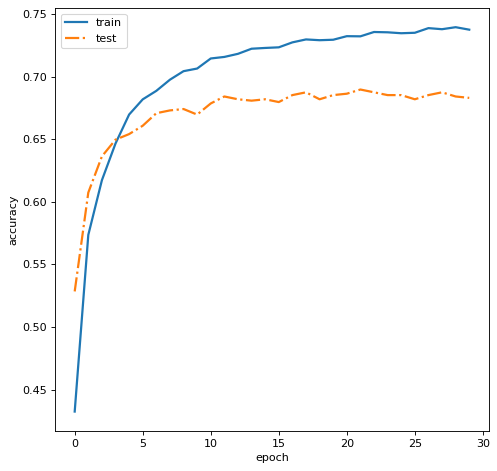

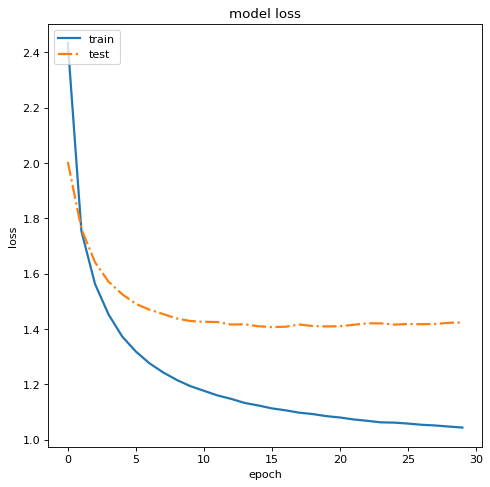

In [ ]:
plt.figure(figsize=(7, 7), dpi = 80, facecolor='w', edgecolor='k')
plt.plot(history_1.history['accuracy'], '-', linewidth=2)
plt.plot(history_1.history['val_accuracy'], '-.', linewidth=2)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_1.history['loss'], '-', linewidth=2)
plt.plot(history_1.history['val_loss'], '-.', linewidth=2)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score_1 = model_v1.evaluate(x_test_vec, y_test_onehot,
                            batch_size=32, verbose=1)
print('Test score:', score_1[0])
print('Test accuracy:', score_1[1])

71/71 [==============================] - 0s 2ms/step - loss: 1.3852 - accuracy: 0.6866
Test score: 1.3851975202560425
Test accuracy: 0.6865538954734802


In [ ]:
def get_model_v2(input_shape):
  inputs = Input(shape=(input_shape,))
  hidden1 = Dense(256, activation='relu')(inputs)
  dropout = Dropout(0.5)(hidden1)
  outputs = Dense(46, activation='softmax')(dropout)
  model = Model(inputs=inputs, outputs=outputs)

  return model

In [ ]:
model_v2 = get_model_v2(input_shape=100)
model_v2.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
history_2 = model_v2.fit(x_train_vec, y_train_onehot,
                         batch_size=32,
                         epochs=30,
                         verbose=1,
                         validation_split=0.1)

Epoch 1/30
253/253 [==============================] - 3s 5ms/step - loss: 1.8905 - accuracy: 0.5442 - val_loss: 1.5421 - val_accuracy: 0.6529
Epoch 2/30
253/253 [==============================] - 1s 3ms/step - loss: 1.4464 - accuracy: 0.6484 - val_loss: 1.4166 - val_accuracy: 0.6685
Epoch 3/30
253/253 [==============================] - 1s 3ms/step - loss: 1.3135 - accuracy: 0.6720 - val_loss: 1.3614 - val_accuracy: 0.6819
Epoch 4/30
253/253 [==============================] - 1s 3ms/step - loss: 1.2471 - accuracy: 0.6867 - val_loss: 1.3350 - val_accuracy: 0.6863
Epoch 5/30
253/253 [==============================] - 1s 3ms/step - loss: 1.1908 - accuracy: 0.6979 - val_loss: 1.2997 - val_accuracy: 0.6952
Epoch 6/30
253/253 [==============================] - 1s 3ms/step - loss: 1.1493 - accuracy: 0.7033 - val_loss: 1.2903 - val_accuracy: 0.7008
Epoch 7/30
253/253 [==============================] - 1s 4ms/step - loss: 1.1152 - accuracy: 0.7143 - val_loss: 1.2783 - val_accuracy: 0.7030
Epoch 

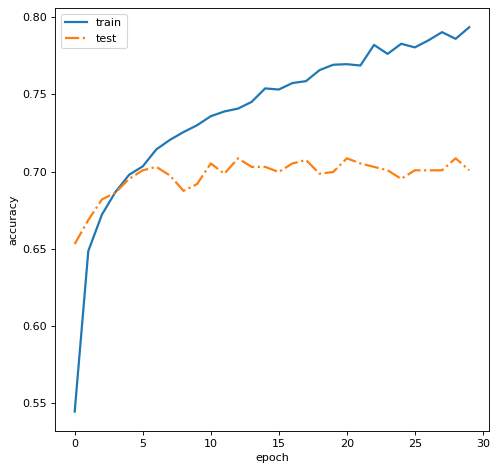

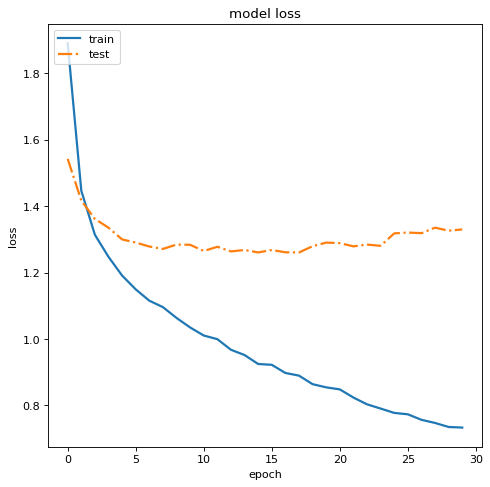

In [ ]:
plt.figure(figsize=(7, 7), dpi = 80, facecolor='w', edgecolor='k')
plt.plot(history_2.history['accuracy'], '-', linewidth=2)
plt.plot(history_2.history['val_accuracy'], '-.', linewidth=2)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_2.history['loss'], '-', linewidth=2)
plt.plot(history_2.history['val_loss'], '-.', linewidth=2)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score_2 = model_v2.evaluate(x_test_vec, y_test_onehot,
                            batch_size=32, verbose=1)
print('Test score:', score_2[0])
print('Test accuracy:', score_2[1])

71/71 [==============================] - 0s 2ms/step - loss: 1.3005 - accuracy: 0.7004
Test score: 1.3004940748214722
Test accuracy: 0.7003561854362488


In [ ]:
max_words = 10000
batch_size = 32
epochs = 30

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words, test_split=0.2)

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

x_train_vec = vectorize_sequences(x_train,
                                  dimension=max_words)
x_test_vec = vectorize_sequences(x_test, dimension=max_words)

model_v2 = get_model_v2(max_words)
model_v2.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
model_v2.summary()

history_2_2 = model_v2.fit(x_train_vec, y_train_onehot,
                           batch_size=batch_size,
                           epochs=epochs,
                           verbose=1,
                           validation_split=0.1)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10000)]           0         
                                                                 
 dense_3 (Dense)             (None, 256)               2560256   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 46)                11822     
                                                                 
Total params: 2,572,078
Trainable params: 2,572,078
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
253/253 [==============================] - 3s 6ms/step - loss: 1.4197 - accuracy: 0.6940 - val_loss: 1.0199 - val_accuracy: 0.7786
Epoch 2/30
253/253 [===================

71/71 [==============================] - 0s 3ms/step - loss: 1.3519 - accuracy: 0.7947
Test score: 1.3518953323364258
Test accuracy: 0.7947462201118469


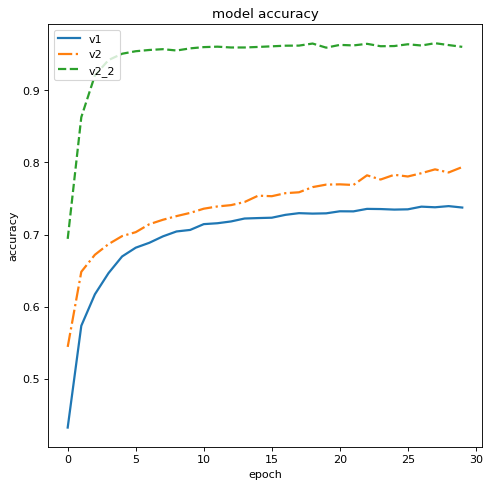

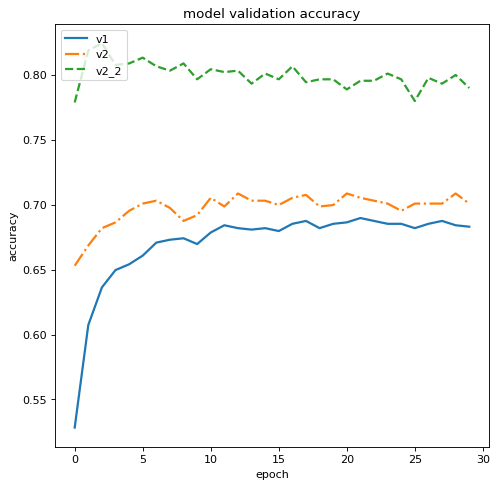

In [ ]:
score_2_2 = model_v2.evaluate(x_test_vec, y_test_onehot,
                              batch_size=32, verbose=1)
print('Test score:', score_2_2[0])
print('Test accuracy:', score_2_2[1])

plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history_1.history['accuracy'], '-', linewidth=2)
plt.plot(history_2.history['accuracy'], '-.', linewidth=2)
plt.plot(history_2_2.history['accuracy'], '--', linewidth=2)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['v1', 'v2', 'v2_2'], loc='upper left')
plt.show()

plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history_1.history['val_accuracy'], '-', linewidth=2)
plt.plot(history_2.history['val_accuracy'], '-.', linewidth=2)
plt.plot(history_2_2.history['val_accuracy'], '--', linewidth=2)
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['v1', 'v2', 'v2_2'], loc='upper left')
plt.show()

In [ ]:
import numpy as np

def pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0):
    lengths = [len(s) for s in sequences]

    nb_samples = len(sequences)
    if maxlen is None:
        maxlen = np.max(lengths)

    # take the sample shape from the first non empty sequence
    # checking for consistency in the main loop below.
    sample_shape = tuple()
    for s in sequences:
        if len(s) > 0:
            sample_shape = np.asarray(s).shape[1:]
            break

    x = (np.ones((nb_samples, maxlen) + sample_shape) * value).astype(dtype)
    for idx, s in enumerate(sequences):
        if len(s) == 0:
            continue  # empty list was found
        if truncating == 'pre':
            trunc = s[-maxlen:]
        elif truncating == 'post':
            trunc = s[:maxlen]
        else:
            raise ValueError('Truncating type "%s" not understood' % truncating)

        # check `trunc` has expected shape
        trunc = np.asarray(trunc, dtype=dtype)
        if trunc.shape[1:] != sample_shape:
            raise ValueError('Shape of sample %s of sequence at position %s is different from expected shape %s' %
                             (trunc.shape[1:], idx, sample_shape))

        if padding == 'post':
            x[idx, :len(trunc)] = trunc
        elif padding == 'pre':
            x[idx, -len(trunc):] = trunc
        else:
            raise ValueError('Padding type "%s" not understood' % padding)
    return x


In [ ]:
from keras.layers import Embedding, LSTM
from keras.optimizers import Adam
from keras.preprocessing import sequence

num_words = 10000
max_words = 96
batch_size = 256
epochs = 30

def get_lstm_model(input_shape):
  inputs = Input(shape=(input_shape,))
  inputs_emb = Embedding(num_words, input_shape)(inputs)
  hidden2 = LSTM(96, dropout=0.3, recurrent_dropout=0.3, return_sequences=False, activation='tanh')(inputs_emb)
  outputs = Dense(46, activation='softmax')(hidden2)
  model = Model(inputs=inputs, outputs=outputs)

  return model

(x_train, y_trian), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

x_train_seq = pad_sequences(x_train, maxlen=max_words, padding='post', truncating='post')
x_test_seq = pad_sequences(x_test, maxlen=max_words, padding='post', truncating='post')

_adam = Adam(lr=0.001)

model_v3 = get_lstm_model(max_words)
model_v3.compile(loss='categorical_crossentropy',
                 optimizer=_adam,
                 metrics=['accuracy'])
model_v3.summary()

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 96)]              0         
                                                                 
 embedding (Embedding)       (None, 96, 96)            960000    
                                                                 
 lstm (LSTM)                 (None, 96)                74112     
                                                                 
 dense_5 (Dense)             (None, 46)                4462      
                                                                 
Total params: 1,038,574
Trainable params: 1,038,574
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_3 = model_v3.fit(x_train_seq, y_train_onehot,
                         batch_size=batch_size,
                         epochs=epochs,
                         verbose=1,
                         validation_split=0.1)

Epoch 1/30
32/32 [==============================] - 19s 507ms/step - loss: 2.9644 - accuracy: 0.3342 - val_loss: 2.4524 - val_accuracy: 0.3315
Epoch 2/30
32/32 [==============================] - 17s 524ms/step - loss: 2.3318 - accuracy: 0.3688 - val_loss: 2.3233 - val_accuracy: 0.3515
Epoch 3/30
32/32 [==============================] - 16s 494ms/step - loss: 2.1684 - accuracy: 0.3860 - val_loss: 2.2094 - val_accuracy: 0.3726
Epoch 4/30
32/32 [==============================] - 16s 487ms/step - loss: 2.0586 - accuracy: 0.3904 - val_loss: 2.0376 - val_accuracy: 0.3771
Epoch 5/30
32/32 [==============================] - 16s 489ms/step - loss: 2.1914 - accuracy: 0.4357 - val_loss: 2.1116 - val_accuracy: 0.4750
Epoch 6/30
32/32 [==============================] - 16s 516ms/step - loss: 2.0022 - accuracy: 0.4855 - val_loss: 2.0366 - val_accuracy: 0.4828
Epoch 7/30
32/32 [==============================] - 15s 473ms/step - loss: 1.9174 - accuracy: 0.5055 - val_loss: 2.0334 - val_accuracy: 0.4816

In [ ]:
score_3 = model_v3.evaluate(x_test_seq, y_test_onehot,
                            batch_size=32, verbose=1)
print('Test score:', score_3[0])
print('Test accuracy:', score_3[1])

71/71 [==============================] - 2s 30ms/step - loss: 1.4959 - accuracy: 0.6536
Test score: 1.4959352016448975
Test accuracy: 0.6536064147949219


In [ ]:
from keras.layers import Bidirectional

def get_bilstm_model(input_shape):
  inputs = Input(shape=(input_shape,))
  inputs_emb = Embedding(num_words, input_shape)(inputs)
  hidden2 = Bidirectional(LSTM(96, dropout=0.3,
                               recurrent_dropout=0.3, return_sequences=False,
                               activation='tanh'))(inputs_emb)
  outputs = Dense(46, activation='softmax')(hidden2)
  model = Model(inputs=inputs, outputs=outputs)

  return model

model_v4 = get_bilstm_model(max_words)
model_v4.compile(loss='categorical_crossentropy',
                 optimizer=_adam,
                 metrics=['accuracy'])
model_v4.summary()

history_4 = model_v4.fit(x_train_seq, y_train_onehot,
                         batch_size=batch_size,
                         epochs=epochs,
                         verbose=1,
                         validation_split=0.1)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 96)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 96, 96)            960000    
                                                                 
 bidirectional (Bidirectiona  (None, 192)              148224    
 l)                                                              
                                                                 
 dense_6 (Dense)             (None, 46)                8878      
                                                                 
Total params: 1,117,102
Trainable params: 1,117,102
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
32/32 [==============================] - 35s 952ms/step - loss: 2.2864 - accuracy: 0.4313 - val_loss: 1.

In [ ]:
score_4 = model_v4.evaluate(x_test_seq, y_test_onehot,
                            batch_size=32, verbose=1)
print('Test score:', score_3[0])
print('Test accuracy:', score_3[1])

71/71 [==============================] - 5s 75ms/step - loss: 1.3046 - accuracy: 0.7716
Test score: 1.4959352016448975
Test accuracy: 0.6536064147949219


In [ ]:
from keras.layers import Conv1D, MaxPooling1D
def get_cnn_lstm_model(input_shape):
  inputs = Input(shape=(input_shape,))
  inputs_emb = Embedding(num_words, input_shape)(inputs)
  conv_1 = Conv1D(48, 3, padding='same',
                  activation='relu')(inputs_emb)
  pool_1 = MaxPooling1D(pool_size=3)(conv_1)
  drop_1 = Dropout(0.25)(pool_1)
  lstm_2 = Bidirectional(LSTM(48, dropout=0.3,
                              recurrent_dropout=0.3, return_sequences=False,
                              activation='tanh'))(drop_1)
  outputs = Dense(46, activation='softmax')(lstm_2)
  model = Model(inputs=inputs, outputs=outputs)

  return model

model_v5 = get_cnn_lstm_model(max_words)
model_v5.compile(loss='categorical_crossentropy',
                 optimizer=_adam,
                 metrics=['accuracy'])
model_v5.summary()

history_5 = model_v5.fit(x_train_seq, y_train_onehot,
                         batch_size=batch_size,
                         epochs=epochs,
                         verbose=1,
                         validation_split=0.1)


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 96)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 96, 96)            960000    
                                                                 
 conv1d (Conv1D)             (None, 96, 48)            13872     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 32, 48)           0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 32, 48)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 96)               37248     
 nal)                                                      

In [ ]:
score_5 = model_v5.evaluate(x_test_seq, y_test_onehot,
                            batch_size=32, verbose=1)
print('Test score:', score_3[0])
print('Test accuracy:', score_3[1])

71/71 [==============================] - 2s 30ms/step - loss: 1.3624 - accuracy: 0.7418
Test score: 1.4959352016448975
Test accuracy: 0.6536064147949219


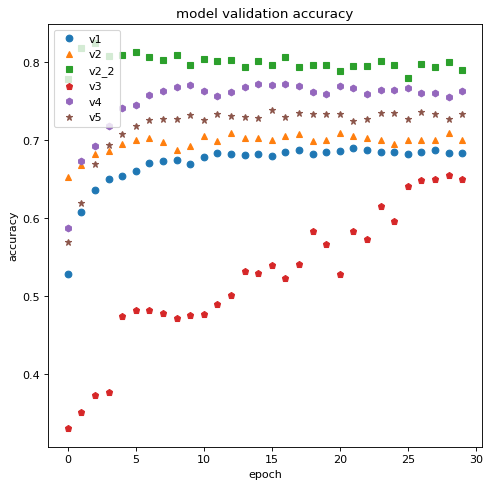

In [ ]:
plt.figure(figsize=(7,7), dpi= 80, facecolor='w',
           edgecolor='k')
plt.plot(history_1.history['val_accuracy'], 'o')
plt.plot(history_2.history['val_accuracy'], '^')
plt.plot(history_2_2.history['val_accuracy'], 's')
plt.plot(history_3.history['val_accuracy'], 'p')
plt.plot(history_4.history['val_accuracy'], 'h')
plt.plot(history_5.history['val_accuracy'], '*')
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['v1', 'v2', 'v2_2', 'v3', 'v4', 'v5'],
           loc='upper left')
plt.show()
